In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set up matplotlib
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 5)
colors = sns.color_palette()

# Simulated annealing for vertex cover

In [61]:
n_vertices = 100
graph = []

In [54]:
# an almost complete graph
for i in range(n_vertices):
    for j in range(n_vertices):
        if i != j and np.random.rand() < 0.8:
            graph.append((i, j))


In [58]:
# a star
for i in range(n_vertices):
    if i != 0:
        graph.append((0, i))


In [62]:
# a tree
for i in range(n_vertices):
    if i != 0:
        graph.append((np.random.randint(0, i), i))

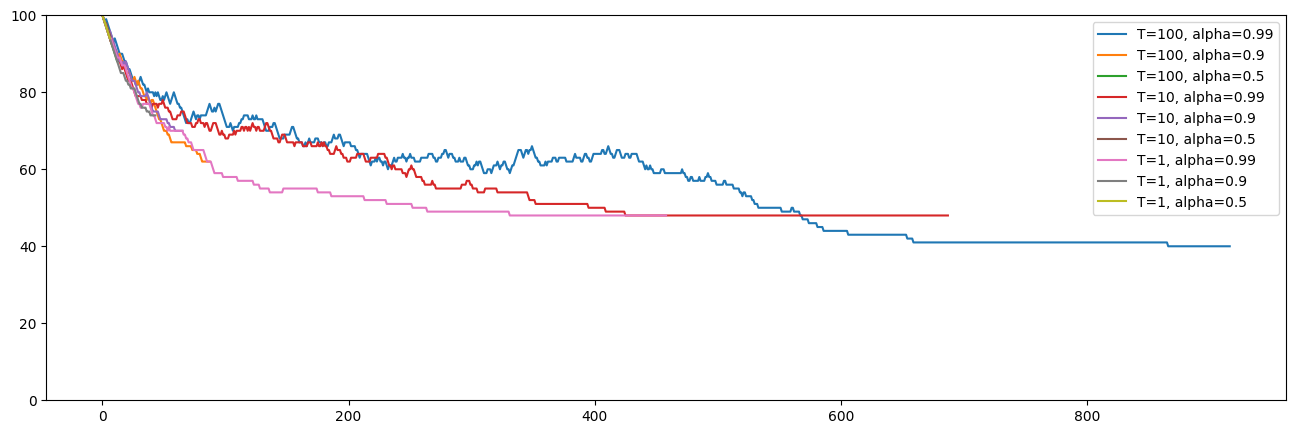

In [66]:
# the cost is the number of vertices in the solution
def cost_function(x):
    return sum(x)

def valid_solution(x):
    for i, j in graph:
        if x[i] == 0 and x[j] == 0:
            return False
    return True

# custom implementation of simulated annealing with explanatory comments
def simulated_annealing(cost_function, initial_solution, T=100, alpha=0.99, max_iter=1000):
    solution = initial_solution.copy()
    # initialize the fitness curve
    fitness_curve = []
    i = 0
    # iterate until the temperature is zero
    while T > 0.01 and i < max_iter:
        new_solution = solution.copy()
        # randomly select and flip a vertex
        i = np.random.randint(0, n_vertices)
        new_solution[i] = 1 - new_solution[i]

        # compare costs
        cost = cost_function(solution)
        cost_new = cost_function(new_solution)
        delta_cost = cost_new - cost

        # ignore invalid solutions
        if not valid_solution(new_solution):
            pass
        # if the new solution is better, accept it
        elif delta_cost < 0:
            solution = new_solution
        # if the new solution is worse, accept it with a probability of e^(-delta_cost/T)
        elif np.random.rand() < np.exp(-delta_cost / T):
            solution = new_solution
        # append the current cost to the fitness curve
        fitness_curve.append(cost)
        # decrease the temperature
        T = alpha * T
        i += 1
    # return the best solution and the fitness curve
    return solution, fitness_curve

# initial solution
x0 = np.ones(n_vertices)

# try the following for various values of T and alpha, put labels on the plot
for T in [100, 10, 1]:
    for alpha in [0.99, 0.9, 0.5]:
        x, fitness_curve = simulated_annealing(cost_function, x0, T=T, alpha=alpha)
        plt.plot(fitness_curve, label='T={}, alpha={}'.format(T, alpha))

plt.ylim(0, n_vertices)
plt.legend()
plt.show()


# Simulated annealing for hill climbing

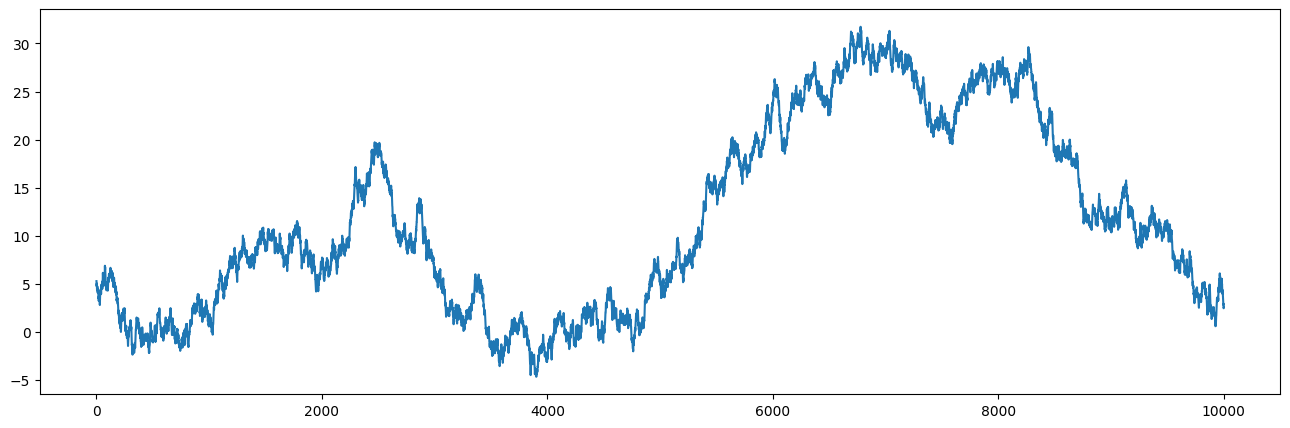

In [93]:
# random curve
n_vertices = 10000
curve = []
pos = 5
for i in range(n_vertices):
    pos += np.random.rand() - 0.5
    curve.append(pos)

plt.plot(curve)


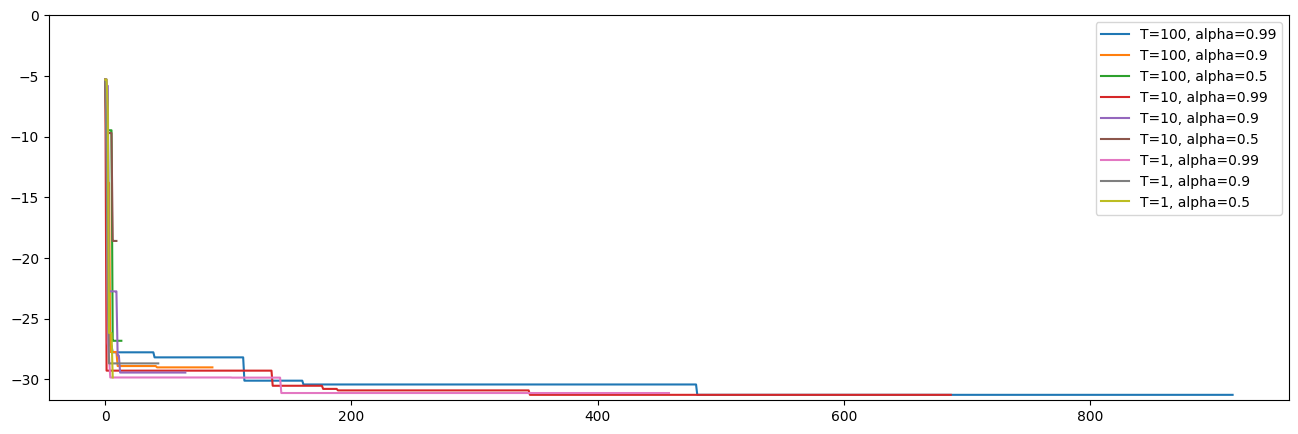

In [97]:
# hill climbing by simulated annealing

# the cost is the neg altitude of the vertex
def cost_function(x):
    return -curve[x]

def hill_climbing(cost_function, initial_solution, T=100, alpha=0.99, max_iter=1000):
    solution = initial_solution
    fitness_curve = []
    i = 0
    while T > 0.01 and i < max_iter:
        # randomly jump elsewhere in the curve
        new_solution = (solution + np.random.randint(0, n_vertices)) % n_vertices

        # compare costs
        cost = cost_function(solution)
        cost_new = cost_function(new_solution)
        delta_cost = cost_new - cost

        # no validity check: every vertex is a valid position

        # if the new solution is better, accept it
        if delta_cost < 0:
            solution = new_solution
        # append the current cost to the fitness curve
        fitness_curve.append(cost)
        # decrease the temperature
        T = alpha * T
        i += 1
    return solution, fitness_curve

# initial solution
x0 = 0

# try the following for various values of T and alpha, put labels on the plot
best = np.inf
best_x = None
for T in [100, 10, 1]:
    for alpha in [0.99, 0.9, 0.5]:
        x, fitness_curve = hill_climbing(cost_function, x0, T=T, alpha=alpha)
        if cost_function(x) < best:
            best = cost_function(x)
            best_x = x
        plt.plot(fitness_curve, label='T={}, alpha={}'.format(T, alpha))

plt.ylim(-max(curve), 0)
plt.legend()
plt.show()


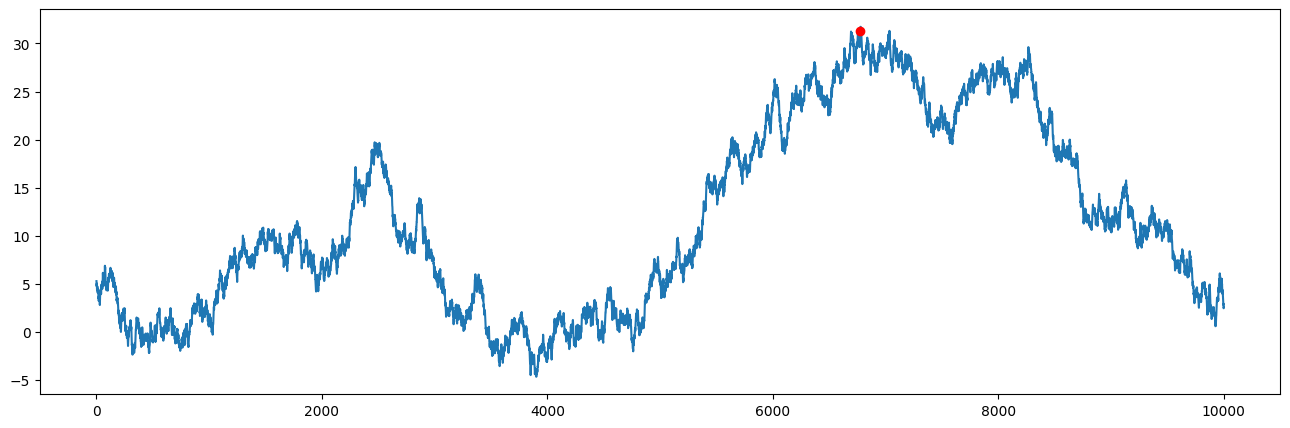

The best solution is at x = 6777, with cost = -31.28453813711587
The actual optimum is at x = 6778, with cost = -31.732914702659304


In [98]:
# also plot the optimum on the curve
plt.plot(curve)
plt.plot(best_x, curve[best_x], 'ro')
plt.show()

print('The best solution is at x = {}, with cost = {}'.format(best_x, best))
print('The actual optimum is at x = {}, with cost = {}'.format(np.argmax(curve), -max(curve)))